In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Extracting a histogram from a grayscale image
For grayscale images, various image processing algorithms use an image histogram. Recall that an image is a two-dimensional array of numerical intensities. An image histogram, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load an unequalized low contrast image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.

In [3]:
# !wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg

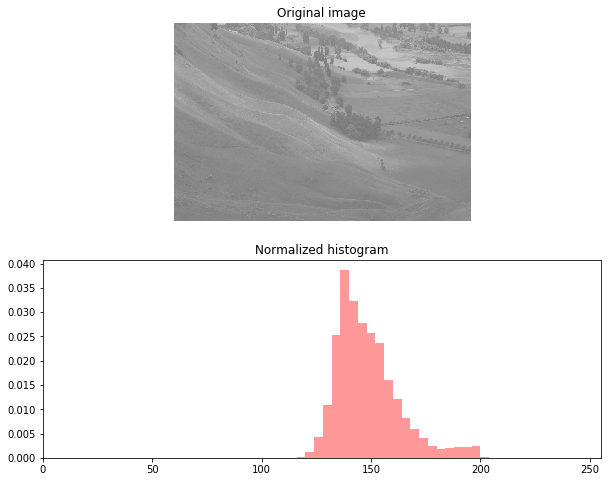

In [11]:
# Load the image into an array: image
image = plt.imread('./Unequalized_Hawkes_Bay_NZ.jpg')
plt.figure(figsize=(10,8))
# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), density=True, color='red', alpha=0.4)

# Display the plot
plt.show()


## Cumulative Distribution Function from an image histogram
A histogram of a continuous random variable is sometimes called a Probability Distribution Function (or PDF). The area under a PDF (a definite integral) is called a Cumulative Distribution Function (or CDF). The CDF quantifies the probability of observing certain pixel intensities.

Your task here is to plot the PDF and CDF of pixel intensities from a grayscale image. You will use the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). This time, the 2D array image will be pre-loaded and pre-flattened into the 1D array pixels for you.

- The histogram option cumulative=True permits viewing the CDF instead of the PDF.
- Notice that plt.grid('off') switches off distracting grid lines.
- The command plt.twinx() allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


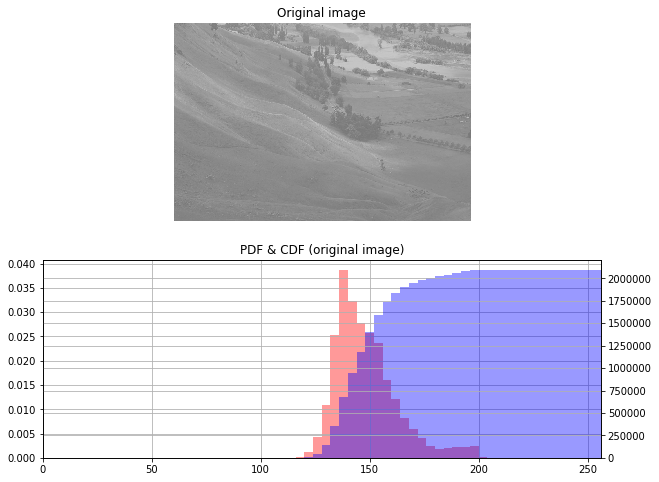

In [19]:
plt.figure(figsize=(10,8))

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=True,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True, normed=False,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()



## Equalizing an image histogram
Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the grayscale image of Hawkes Bay, New Zealand (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0). Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its PDF and CDF.

- The arrays image and pixels are extracted for you in advance.
- The CDF of the original image is computed using plt.hist().
- Notice an array new_pixels is created for you that interpolates new pixel values using the original image CDF.

/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


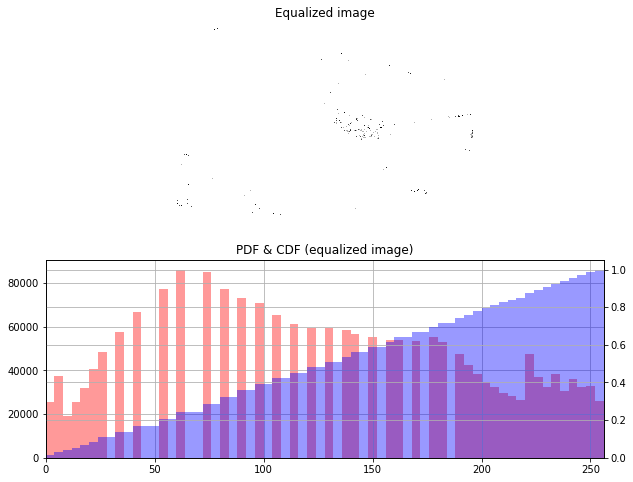

In [25]:
# Flatten the image into 1 dimension: pixels
plt.figure(figsize=(10,8))
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image,cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()


## Extracting histograms from a color image
This exercise resembles the last in that you will plot histograms from an image. This time, you will use a color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

In [29]:
!wget https://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg

--2019-09-05 09:13:40--  https://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg
Resolving imgsrc.hubblesite.org (imgsrc.hubblesite.org)... 34.197.100.198, 34.230.114.38, 34.229.34.126, ...
Connecting to imgsrc.hubblesite.org (imgsrc.hubblesite.org)|34.197.100.198|:443... connected.
ERROR: cannot verify imgsrc.hubblesite.org's certificate, issued by ‘CN=InCommon RSA Server CA,OU=InCommon,O=Internet2,L=Ann Arbor,ST=MI,C=US’:
  Unable to locally verify the issuer's authority.
To connect to imgsrc.hubblesite.org insecurely, use `--no-check-certificate'.


/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/jloscalzo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


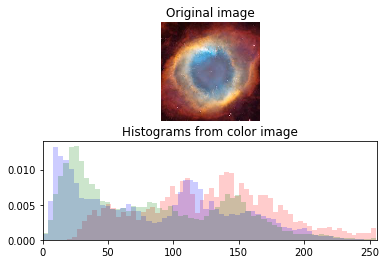

In [40]:
# Load the image into an array: image
image = plt.imread('./hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = image[:,:,0].flatten()
blue_pixels = image[:,:,1].flatten()
green_pixels = image[:,:,2].flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show()


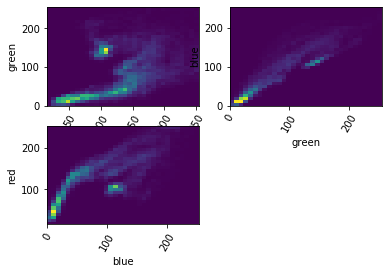

In [41]:
# Load the image into an array: image
image = plt.imread('./hs-2004-32-b-small_web.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels,green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels,blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.show()
